<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<strong>  InstitutoTecnológico y de Estudios Superiores de Occidente </strong>
<br />
<strong>  Maestría Ciencia de Datos  </strong>
<br />

# Optimización Convexa: Aplicación SVM para ingresos de HP Inc. #

<br>
<br>

* * *

David Cisneros, <br>
Carlos Manzo, <br>
Rodrigo Huerta, <br>
Juan Mario Ochoa, <br>
Daniel Nuño <br>

Profesor: Dr. Juan Diego Sanchez Torres <br>
Fecha entrega: 11 de mayo, 2022 <br>

* * *

<br>
<br>

## Desarrollo mátematico de las máquinas de soporte

Support Vector Machines, a set of supervised learning algorithms, serve as a method for classification or regression from a set of training data to build a model that can predict the class of a new observation. Classifying information, data, is the problem of identifying as to where does an observation belong to in a set of categories. 

Support Vector Machines divides within boundaries (called hyperplane) the set of observations into classes (called features) optimally and distinctly identifies where does the observation belong to. The vector with the closest points to the hyperplane is called support vector, hence SVM. 

Regression analysis consists on performing some procedures for estimating the relationships between a dependent variable (the one expected to predict) and one or more independent variables (also known as features, attributes or predictors). Linear regression is the most frequent type of regression analysis, in which a line (or linear combination) best fits the data.

In a step further from the SVM, Support Vector Regression (SVR) will have some adjusment to the orignial procedure. A margin of tolerance $\epsilon$ is established near the vector to reduce (minimize) the error. 

The simple linear regression equation would be:\
$y = mx + b$ 

While the linear regression in SVR starts as:\
$y = wx + b$

The problem itself becomes:\
$min\:  \frac{1}{2}||w||^2+C\sum_{k=1}^{N}(\xi+\xi^*)$

Where $C>0$ determines the equilibrium between regularization of the regression function and how much more of $\epsilon$ is tolerated. 

With constraints:\
$y_k=wx_k-b\leq\varepsilon+\xi_k$\
$wx_k+b-y_k\leq\varepsilon+\xi_k^*$\
$\xi_k,\xi_k^* \geq 0$

Where $\xi$ and $\xi^*$ are the variables that control the error from the regression function.


For a linear problem, the SVR is given as:\
$y=\sum_{k=1}^{N}(\alpha_k-\alpha_k^*)\langle x_k, x\rangle + b$

For a non-linear problem, the SVR is given as:\
$y=\sum_{k=1}^{N}(\alpha_k-\alpha_k^*)\langle \phi(x_k), \phi(x)\rangle + b$

Which can be transformed from higher dimension (of the hyperplane) into a lower dimension using the kernel trick, leaving:\
$y=\sum_{k=1}^{N}(\alpha_k-\alpha_k^*)K( x_k,x) + b$

For the **linear case**, the way to get there is with the Lagrangian, including the restrictions. Then get from this Primal function into the Dual function. 
With $w, b, \xi, \xi^*$ being the original variables, the Lagrangian will be defined as $L = (w, b, \xi, \xi^*, \alpha, \alpha^*, \eta, \eta^*)$, where $\alpha, \alpha^*, \eta, \eta^*$ are the Dual variables related to the restrictions. 

Therefore, 
$L = \frac{1}{2}||w||^2 + C\sum_{k=1}^{N}(\xi_k+\xi_k^*)-\sum_{k=1}^{N}(\alpha_k(\epsilon+\xi_k-y_k+\phi(x_k)+b))-\sum_{k=1}^{N}(\alpha_k^*(\epsilon+\xi_k^*+y_k+\phi(x_k)-b))-\sum_{k=1}^{N}(\eta_k\xi_k+\eta_k^*\xi_k^*)$

Finding the partial derivatives in respect to the primal variables:

$\frac{\partial L}{\partial w} = w-\sum_{k=1}^{N}((\alpha_k^*-\alpha_k)x_k)=0$  $\Rightarrow w = \sum_{k=1}^{N}((\alpha_k^*-\alpha_k)x_k)$

$\frac{\partial L}{\partial b} = \sum_{k=1}^{N}((\alpha_k^*-\alpha_k)x_k) = 0$\\

$\frac{\partial L}{\partial \xi_k} = C-\alpha_k-\eta_k=0$   $\Rightarrow \eta_k=C-\alpha_k\geq0$

$\frac{\partial L}{\partial \xi_k^*} = = C-\alpha_k-\eta_k^*=0$  $\Rightarrow \eta_k^*=C-\alpha_k^*\geq0$


Substituting back in Lagrangian and simplifying we reach the Dual function:\\
$-\frac{1}{2}||w||^2 +\sum_{k,l=1}^{N}(\alpha_k-\alpha_k^*)(\alpha_l-\alpha_l^*)\langle x_k,x_l \rangle -\epsilon\sum_{k=1}^{N}(\alpha_k+\alpha_k^*)+\sum_{k,l=1}^{N}y_k(\alpha_k-\alpha_k^*)$
s.t. $\sum_{k,l=1}^{N}(\alpha_k-\alpha_k^*)=0$

From this function the regression model for prediction can be obtained:
$f(x)=\sum_{k=1}^{N}(\alpha_k-\alpha_k^*)\langle x_k, x_l\rangle + b$

This way, the function does not depend on any form of high dimensions and would only depend on the support vectors.

Now, the only pending item to be known is the $b$ and to get it, we find the Karush-Kuhn-Tucker (KKT) conditions. 

$\alpha_k(\epsilon+\xi_k+y_k+\langle w,x_k \rangle+b=0$
$\alpha_k^*(\epsilon+\xi_k^*+y_k+\langle w,x_k \rangle-b=0$
$(C-\alpha_k)\xi_k=0$
$(C-\alpha_k^*)\xi_k^*=0$

If $\alpha_k = 0$ or $\alpha_k^*=0$ then it would be out of limits. Two dual variables cannot be triggered at the same time, so $\alpha_k\alpha_k^*=0$. And for those cases where $0<\alpha_k,\alpha_k^*<C$, both $x_k,x_k^*$ would be 0. And from all these, $b$ can be obtained as:

$b=y_k-\langle w,x_k \rangle-\epsilon$ if $\alpha_k \in (0, C)$ \
$b=y_k-\langle w,x_k \rangle+\epsilon$ if $\alpha_k^* \in (0, C)$

For the **non linear case**, the procedure would be almost the same than that of the linear case. However, the difference would lie in $\phi$, being an entry from the characteristics space, and can be for higher dimensions (even infinite). 
In these cases the non-linear regression in SVR starts as:\
$f(x) = \langle w, \phi (x) \rangle + b$


The problem starts just like before:\
$min\:  \frac{1}{2}||w||^2+C\sum_{k=1}^{N}(\xi+\xi^*)$


With constraints:\
$y_k=\langle w, \phi (x_k) \rangle\leq\varepsilon+\xi_k$\
$\langle w, \phi(x_k) \rangle - y_k \leq \varepsilon + \xi_k^*$\
$\xi_k,\xi_k^* \geq 0$


And just like in the linear problem, we find the Lagrangian, get the partial derivatives in respect to the Primal variables and get the Dual by substituting back in the Lagrangian. Performing all this gives way to the simplified form of:\
$-\frac{1}{2}\sum_{k,l=1}^{N}(\alpha_k-\alpha_k^*)(\alpha_l-\alpha_l^*)\langle \phi (x_k), \phi (x_l) \rangle -\epsilon\sum_{k=1}^{N}(\alpha_k+\alpha_k^*)+\sum_{k,l=1}^{N}y_k(\alpha_k-\alpha_k^*)$\
s.t. $\sum_{k,l=1}^{N}y_k(\alpha_k-\alpha_k^*)=0$\
$\alpha_k,\alpha_k^*=0$\
$0<\alpha_k,\alpha_k^*<C$

Being a higher dimensional problem, solving it could pose a problem computationally. To make things easier, the "Kernel trick" is applied. In other words, it assigns each pair of elements of the input space $X$, a real value corresponding to the scalar product of the images of these elements in a new space, that is:

$K(x_k,x_l) = \langle \phi(x_k), \phi(x_l) \rangle$

So, applying this kernel trick, the problem solves like:\
$-\frac{1}{2}\sum_{k,l=1}^{N}(\alpha_k-\alpha_k^*)(\alpha_l-\alpha_l^*)K(x_k,x_l) -\epsilon \sum_{k=1}^{N}(\alpha_k+\alpha_k^*)+\sum_{k=1}^{N} y_k(\alpha_k-\alpha_k^*)$\
s.t. $\sum_{k=1}^{N}y_k(\alpha_k-\alpha_k^*)=0$\
$\alpha_k,\alpha_k^*=0$\
$0<\alpha_k,\alpha_k^*<C$

From where we can get the regression function:\
$f(x)=\sum_{k,l=1}^{N}(\alpha_k-\alpha_k^*) K(x_k,x_l) + b$

## Desarrolo y comparación del modelo

In [183]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.svm import SVR
from sklearn.metrics.pairwise import (linear_kernel,polynomial_kernel,rbf_kernel)
from sklearn.metrics import mean_squared_error as mse, r2_score
import matplotlib.pyplot as plt

plt.style.use('classic')

raw_data = pd.read_excel('https://github.com/dcisneroschavira/proyecto_oc/raw/main/BS%20by%20acc.xlsx')

In [184]:
data = raw_data.copy()
data.month = data.month + '-01'
data['month'] = pd.to_datetime(data['month'])
data.account = data['account'].astype('str')
data = data.pivot(index=['month'], columns=['account'], values=['Total'])
data = data.droplevel(0, axis=1)
data = data[['1206', '2561', '2569', '2574', '2575', '2576', '2577', '2582']]

X_periods = np.arange(len(data)).reshape(-1,1)

data_index = pd.date_range(start=data.index.min(),
                            end=data.index.max(),
                            freq='M')

data = data.fillna(axis=1, method='backfill')

data_scale = pd.DataFrame(minmax_scale(data), index=data.index, columns=data.columns)


La siguiente gráfica podemos ver el comportamiento de los datos y validar el efecto de la normalización.

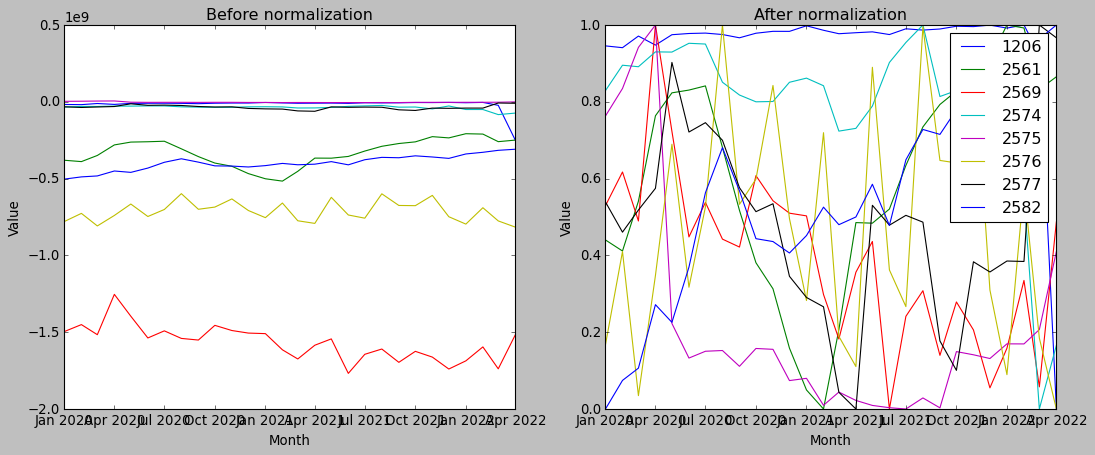

In [185]:
fig = plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(data)
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Before normalization')

plt.subplot(1,2,2)
plt.plot(data_scale)
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('After normalization')
plt.legend(data.columns)
plt.show()

## Ingeniería de características para encontrar el mejor conjunto de datos

Ya que para esta serie de tiempo no tenemos más variables dependientes que expliquen el comportamiento, queremos encontrar las características que generen el mejor modelo. Para esto vamos a comparar los data sets con la máquina de soporte lineal. Posteriormente que seleccionemos un conjunto de datos, vamos a comparar con los demás modelos de máquina de soporte y Kernels.

La cuenta para realizar esta investigación es la **2569**.

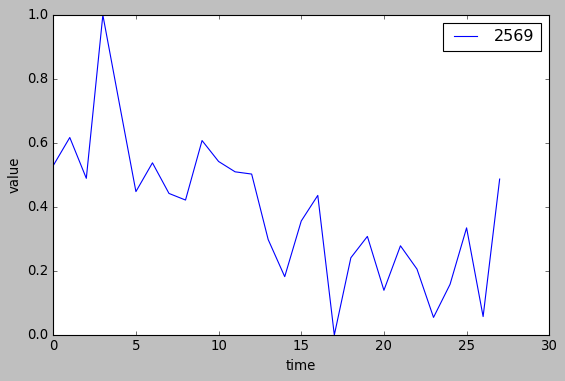

In [186]:
y = data_scale['2569'].values.ravel()
X = X_periods

plt.figure(figsize=(8,5))
plt.plot(X, y, c='b', label='2569')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

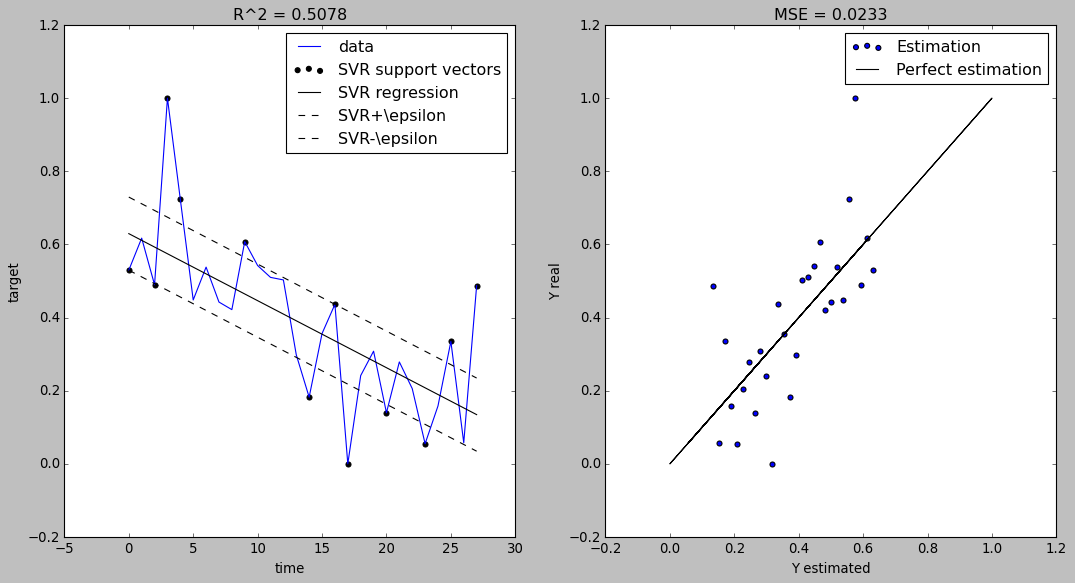

In [187]:
def compare_svr(X, y, test_window, kernel, epsilon, gamma, degree, do_plot='No'):
    if test_window == 0:
        # params
        #epsilon = 0.1
        #kernel = 'linear'
        #gamma = 'auto'
        #degree = 3
        
        # kernel transformation
        if kernel == 'linear':
            K_x = linear_kernel(X)
        elif kernel == 'rbf':
            K_x = rbf_kernel(X)
        else:
            K_x = polynomial_kernel(X)

        # creating a SVR model class
        model_svr = SVR(kernel=kernel, epsilon=epsilon, gamma=gamma, degree=degree)
        # Step 2. Training the model
        model_svr.fit(X, y)
        # Step 3. Using the model
        y_hat = model_svr.predict(X)
        # Step 4. Evaluation of results
        sv_x = model_svr.support_
        R2 = model_svr.score(X,y)
        Y_plot = model_svr.predict(X)

        #%% Prediction using the optimization problem results.
        alphas = model_svr.dual_coef_
        x_sv = model_svr.support_vectors_
        b = model_svr.intercept_
        # Needs the correct Kernel
        if kernel == 'linear':
            K_x = linear_kernel(x_sv, X)
        elif kernel == 'rbf':
            K_x = rbf_kernel(x_sv, X)
        else:
            K_x = polynomial_kernel(x_sv, X)

        Y_p = np.dot(alphas, K_x) + b

        if do_plot == 'Yes':
            if X.shape[1] == 1:
                # View the results
                fig = plt.figure(figsize=(16,8))
                plt.subplot(1,2,1)
                plt.plot(X, y, c='b', label='data')
                plt.scatter(X[sv_x], y[sv_x], c='k', label='SVR support vectors', zorder=1,edgecolors=(0, 0, 0))
                plt.plot(X, Y_plot, c='k',label='SVR regression')
                plt.plot(X, Y_plot+epsilon, c='k', linestyle='dashed',label='SVR+\epsilon')
                plt.plot(X, Y_plot-epsilon, c='k', linestyle='dashed',label='SVR-\epsilon')
                plt.xlabel('time')
                plt.ylabel('target')
                plt.title('R^2 = %0.4f'%model_svr.score(X,y))
                plt.legend()

                plt.subplot(1,2,2)
                plt.scatter(y_hat, y, c='b', label='Estimation')
                plt.plot(y, y, c='k', label='Perfect estimation')
                plt.xlabel('Y estimated')
                plt.ylabel('Y real')
                plt.title('MSE = %0.4f'%mse(y, y_hat))
                plt.legend()
                plt.show()
            else:
                # View the results
                plt.figure(figsize=(7,5))
                plt.scatter(y_hat, y, c='b', label='Estimation')
                plt.plot(y, y, c='k', label='Perfect estimation')
                plt.xlabel('Y estimated')
                plt.ylabel('Y real')
                plt.title('SVM ' + kernel + ' K |MSE = %0.4f'%mse(y, y_hat) + ' | R^2 = %0.4f'%model_svr.score(X,y))
                plt.legend()
                plt.show()
        
        return mse(y, y_hat), model_svr.score(X,y)
    
    #split test and train
    else:
        X_train = X[:-test_window]
        X_test = X[len(X) - test_window:]
        y_train = y[:-test_window]
        y_test = y[len(y) - test_window:]
        
        # creating a SVR model class
        model_svr = SVR(kernel=kernel, epsilon=epsilon, gamma=gamma, degree=degree)
        # Training the model
        model_svr.fit(X_train, y_train)
        #Using the model
        y_hat = model_svr.predict(X_test)
        #return train and test model accuracy
        R2_train = r2_score(y_train, model_svr.predict(X_train))
        mse_mtrc_train = mse(y_train, model_svr.predict(X_train))
        R2_test = r2_score( y_test, y_hat)
        mse_mtrc_test = mse(y_test, y_hat)

        if do_plot == 'Yes':
            plt.figure()
            plt.scatter(x=range(len(X_train)), y=y_train, c='b', label='train', s=20)
            plt.scatter(x=range(len(X)-test_window,len(X)), y=y_test, c='g', label='test', s=40)
            plt.scatter(x=range(len(X)-test_window,len(X)), y=y_hat, c='r', label='estimated', s=40)
            plt.xlabel('period month')
            plt.ylabel('value')
            plt.title('LS ' + kernel + ' K |MSE = %0.3f'%mse(y_test, y_hat) + ' |R^2 = %0.3f'%r2_score(y_test, y_hat))
            plt.legend()
            plt.show()

        # return train and test metrics
        return mse_mtrc_train, R2_train, mse_mtrc_test, '%0.2f'%R2_test

_, _ = compare_svr(X, y, 0 , 'linear', 0.1, 'auto', 3, do_plot='Yes')

Ahora, podemos usar las otras cuentas como variables independientes, de manera que tendríamos 9 variables independientes.

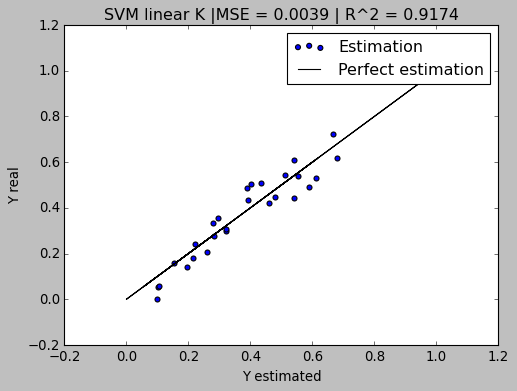

In [188]:
y = data_scale['2569'].values.ravel()
X = data_scale[list(set(data_scale.columns) - set('2569'))].values
X = np.column_stack((X, X_periods))
_, _ = compare_svr(X, y, 0, 'linear', 0.1, 'auto', 3, do_plot='Yes')

Tiene resultados bastante buenos. De hecho, si modificas épsilon para reducir el slack puedes alcanzar una regresión casi perfecta. Podría suponer un sobreajuste.
Puede también indicar que la correlación, en ese sentido el movimiento de las otras cuentas afecta mucho en el resultado.

Ahora, una pregunta fundamenta es ¿los valores pasados de mi regresión afectan el resultado actual? para comprobarlo podemos ajustar X como rezagos de la variable a predecir.
$$ X_t = y_{t-1}, y_{t-2} $$

El razonamiento para elegir los dos valores anteriores es porque hablando de contabilidad, es la norma que se maneje por ciclos de tres meses.
Es posible que tengan autocorrelación en ese ciclo, por lo tanto, podríamos esperar que los meses previos tengan efecto en el valor actual. Ahora tenemos 11 variables y 26 observaciones.

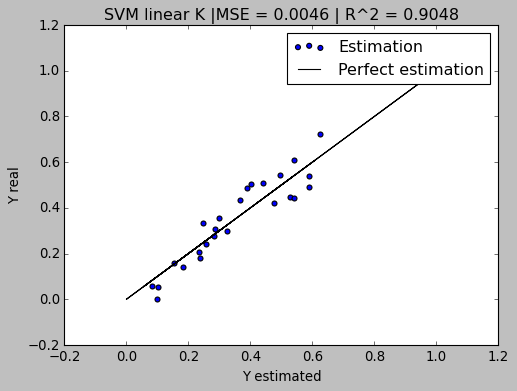

In [189]:
timesteps = 3
train_data = data_scale['2569'].values.reshape(-1, 1)
train_data_timesteps = np.array([[j for j in train_data[i:i+timesteps]]
                                    for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

X, y = train_data_timesteps[:,:timesteps-1], train_data_timesteps[:,[timesteps-1]]
y = y.ravel()
X_others = data_scale[list(set(data_scale.columns) - set('2569'))].values[timesteps-1:,:]
X = np.column_stack((X_periods[timesteps-1:], X, X_others))
_, _ = compare_svr(X, y, 0, 'linear', 0.1, 'auto', 3, do_plot='Yes')

Los resultados de ajuste y error empeoraron ligeramente comparado con el data set pasado, pero una con increíbles resultados.

Ya que en la realidad no podemos utilizar los datos en $t$ de otras cuentas para predecir de la cuenta objetivo $t$, porque ya es muy tarde. Lo que podemos hacer es utilizar el periodo anterior $ X_{t-1} $ de las demás variables independientes para estimar $ y_{t} $

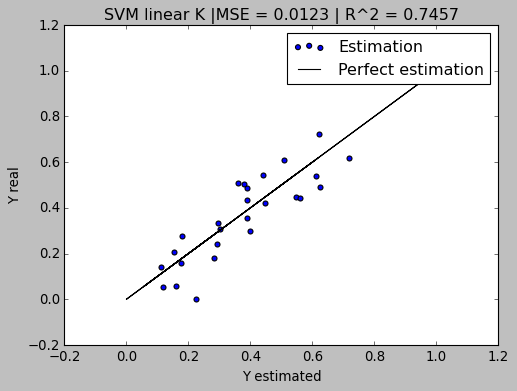

In [190]:
y = data_scale['2569'].values[1:]
y = y.ravel()
X_others = data_scale[list(set(data_scale.columns) - set('2569'))].values[:-1,:]
X = np.column_stack((X_periods[1:], X_others))
_, _ = compare_svr(X, y, 0, 'linear', 0.1, 'auto', 3, do_plot='Yes')

Usualmente los meses que también son fin de cuarto tiene mayor relevancia en los resultados. Puede ser por cuestiones operativas, de mercado, o incluso de ventas. Es por eso que si tenemos una variable categórica que pueda indicar el periodo que indica el fin de cuarto entonces es posible que para los datos sea lo suficientemente relevante.

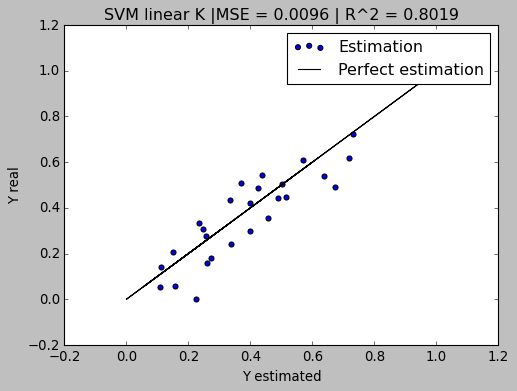

In [191]:
y = data_scale['2569'].values[1:]
y = y.ravel()
X_others = data_scale[list(set(data_scale.columns) - set('2569'))].values[:-1,:]
X_q = [1 if x%3 == 0 else 0 for x in range(len(X_periods))]
X_q = np.array(X_q[1:])
X = np.column_stack((X_periods[1:], X_others, X_q))
_, _ = compare_svr(X, y, 0, 'linear', 0.1, 'auto', 3, do_plot='Yes')

El data set que usa las otras cuentas como variable exógena tiene la mejor precisión, casi perfecta. Sin embargo, es muy improbable que funcione en la realidad por que, para cualquier mes, cuando tu tienes la variable los valores de las variables exógenas es muy tarde para predecir la variable dependiente.

El data set que arrojo los mejores resultados y que se puede usar para pronosticar el siguiente periodo es el que incluye las otras cuentas rezagadas en un periodo, más la variable categórica que indica el fin de cuarto.

Ahora que sabemos que características funcionan mejor para nuestro modelo, podemos evaluar y comparar cada una de las implementaciones de regresores en máquinas de soporte. Y lo mismo para cada una de las cuentas de nuestro interés.

Las implementaciones que evaluaremos es la librería **Sklearn.smv.SVR con kernel lineal, rbf y polinomial**.

Para **LS-SVM**, el doctor en física Danny Vanpoucke realizó una implementación basada en los modelos de sklearn para un regresor. Eso significa que su implementación es muy parecida y compatible con los modelos de sklearn. El siguiente código es la clase LS-SVM.

In [192]:
def build_data_sets(acc):
    #arrange y and X
    y = data_scale[acc].values[1:]
    y = y.ravel()
    X_others = data_scale[list(set(data_scale.columns) - set(acc))].values[:-1,:]
    X_q = [1 if x%3 == 0 else 0 for x in range(len(X_periods))]
    X_q = np.array(X_q[1:])
    X = np.column_stack((X_periods[1:], X_others, X_q))

    return X, y

In [193]:
# -*- coding: utf-8 -*-
"""
Created on Tue May 19 09:27:21 2020
An LS-SVM regression class following the sk-learn API.
_                         _   _   _    _  _
| 0          1^T_N         |  | b  |   | 0 |
|                          |  |    | = |   |
| 1_N  Omega+gamma^-1 I_N  |  | a  |   | Y |
|_                        _|  |_  _|   |_ _|
Omega= Kernel K(x_i,x_j)
gamma= hyper-parameter (is a ratio z/µ with z the sum squared error and µ the
                        amount of regularization)
1_N = vector (1,1,1,..,1)
I_N = NxN unity matrix
@author: Dr. Dr. Danny E. P. Vanpoucke
@web   : https://dannyvanpoucke.be
"""
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, RegressorMixin


class LSSVMRegression(BaseEstimator, RegressorMixin):
    """
    An Least Squared Support Vector Machine (LS-SVM) regression class, build
    on the BaseEstimator and RegressorMixin base classes of sklearn.
    (Let's hope furture upgrades of python sk-learn just doesn't break this...
    consider this a python feature)
    Attributes:
        - gamma : the hyper-parameter (float)
        - kernel: the kernel used     (string)
        - kernel_: the actual kernel function
        - x : the data on which the LSSVM is trained (call it support vectors)
        - y : the targets for the training data
        - coef_ : coefficents of the support vectors
        - intercept_ : intercept term
    """
    def __init__(self, gamma: float = 1.0, kernel: str = None, c: float = 1.0,
                 d: float = 2, sigma: float = 1.0):
        """
        Create a new regressor
        Parameters:
            - gamma: floating point value for the hyper-parameter gamma, DEFAULT=1.0
            - kernel: string indicating the kernel: {'linear','poly','rbf'}, DEFAULT='rbf'
            - the kernel parameters
                    * linear: none
                    * poly:
                        + c: scaling constant, DEFAULT=1.0
                        + d: polynomial power, DEFAULT=2
                    * rbf:
                        + sigma: scaling constant, DEFAULT=1.0
        """
        self.gamma = gamma
        self.c = c
        self.d = d
        self.sigma = sigma
        if kernel is None:
            self.kernel = 'rbf'
        else:
            self.kernel = kernel

        params = dict()
        if kernel == 'poly':
            params['c'] = c
            params['d'] = d
        elif kernel == 'rbf':
            params['sigma'] = sigma

        self.kernel_ = LSSVMRegression.__set_kernel(self.kernel, **params)

        #model parameters
        self.x = None
        self.y = None
        self.coef_ = None
        self.intercept_ = None

    def get_params(self, deep=True):
        """
            The get_params functionality provides the parameters of the LSSVMRegression class.
            These exclude the modelparameters.
        """
        return {"c": self.c, "d": self.d, "gamma": self.gamma,
                "kernel": self.kernel, "sigma":self.sigma}

    def set_params(self, **parameters):
        """
            Set the parameters of the class. Important note: This should do
            anything that is done to relevant parameters in __init__ as
            sklearn's GridSearchCV uses this instead of init.
            More info:  https://scikit-learn.org/stable/developers/develop.html
        """
        #print("SETTING PARAMETERS IN LSSVM:",parameters.items())

        for parameter, value in parameters.items():
            #setattr should do the trick for gamma,c,d,sigma and kernel
            setattr(self, parameter, value)
        #now also update the actual kernel
        params = dict()
        if self.kernel == 'poly':
            params['c'] = self.c
            params['d'] = self.d
        elif self.kernel == 'rbf':
            params['sigma'] = self.sigma
        self.kernel_ = LSSVMRegression.__set_kernel(self.kernel, **params)

        return self

    def set_attributes(self, **parameters):
        """
            Manually set the attributes of the model. This should generally
            not be done, except when testing some specific behaviour, or
            creating an averaged model.
            Parameters are provided as a dictionary.
                - 'intercept_' : float intercept
                - 'coef_'      : float array of coefficients
                - 'support_'   : array of support vectors, in the same order sorted
                                 as the coefficients
        """
        #not the most efficient way of doing it...but sufficient for the time being
        for param, value in parameters.items():
            if param == 'intercept_':
                self.intercept_ = value
            elif param == 'coef_':
                self.coef_ = value
            elif param == 'support_':
                self.x = value

    @staticmethod
    def __set_kernel(name: str, **params):
        """
            Internal static function to set the kernel function.
            NOTE: The second "vector" xj will be the one which generally
                  contains an array of possible vectors, while xi should be a single
                  vector. Therefore, the numpy dot-product requires xj to
                  be transposed.
            The kernel returns either a scalar or a numpy nd-array of
            rank 1 (i.e. a vector), if it returns something else the result
            is wrong if xi is an array.
        """
        def linear(xi, xj):
            """
               v*v=scal (dot-product OK)
               v*m=v    (dot-product OK)
               m*m=m    (matmul for 2Dx2D, ok with dot-product)
            """
            return np.dot(xi, xj.T)

        def poly(xi, xj, c=params.get('c', 1.0), d=params.get('d', 2)):
            """
                Polynomial kernel ={1+ (xi*xj^T)/c }^d
                Parameters:
                    - c: scaling constant, DEFAULT=1.0
                    - d: polynomial power, DEFAULT=2
                    - xi and xj are numpy nd-arrays
                (cf: https://en.wikipedia.org/wiki/Least-squares_support-vector_machine )
                works on same as linear
            """
            return ((np.dot(xi, xj.T))/c  + 1)**d

        def rbf(xi, xj, sigma=params.get('sigma', 1.0)):
            """
            Radial Basis Function kernel= exp(- ||xj-xi||² / (2*sigma²))
            In this formulation, the rbf is also known as the Gaussian kernel of variance sigma²
            As the Euclidean distance is strict positive, the results of this kernel
            are in the range [0..1] (x € [+infty..0])
            Parameters:
                - sigma: scaling constant, DEFAULT=1.0
                - xi and xj are numpy nd-arrays
            (cf: https://en.wikipedia.org/wiki/Least-squares_support-vector_machine )
            Possible combinations of xi and xj:
                vect & vect   -> scalar
                vect & array  -> vect
                array & array -> array => this one requires a pair distance...
                                    which can not be done with matmul and dot
                The vectors are the rows of the arrays (Arr[0,:]=first vect)
                The squared distance between vectors= sqr(sqrt( sum_i(vi-wi)² ))
                --> sqr & sqrt cancel
                --> you could use a dot-product operator for vectors...but this
                seems to fail for nd-arrays.
            For vectors:
                ||x-y||²=sum_i(x_i-y_i)²=sum_i(x²_i+y²_i-2x_iy_i)
                --> all products between vectors can be done via np.dot: takes the squares & sum
            For vector x and array of vectors y:
                --> x²_i : these are vectors: dot gives a scalar
                --> y²_i : this should be a list of scalars, one per vector.
                            => np.dot gives a 2d array
                            => so   1) square manually (squares each element)
                                    2) sum over every row (axis=1...but only in case we
                                                           have a 2D array)
                --> x_iy_i : this should also be a list of scalars. np.dot does the trick,
                            and even gives the same result if matrix and vector are exchanged
            for array of vectors x and array of vectors y:
                --> either loop over vectors of x, and for each do the above
                --> or use cdist which calculates the pairwise distance and use that in the exp
            """
            from scipy.spatial.distance import cdist

           # print('LS_SVM DEBUG: Sigma=',sigma,'  type=',type(sigma) )
           # print('              xi   =',xi,'  type=',type(xi))
           # print('              xj   =',xj,'  type=',type(xj))


            if (xi.ndim == 2 and xi.ndim == xj.ndim): # both are 2D matrices
                return np.exp(-(cdist(xi, xj, metric='sqeuclidean'))/(2*(sigma**2)))
            elif ((xi.ndim < 2) and (xj.ndim < 3)):
                ax = len(xj.shape)-1 #compensate for python zero-base
                return np.exp(-(np.dot(xi, xi) + (xj**2).sum(axis=ax)
                                - 2*np.dot(xi, xj.T))/(2*(sigma**2)))
            else:
                message = "The rbf kernel is not suited for arrays with rank >2"
                raise Exception(message)

        kernels = {'linear': linear, 'poly': poly, 'rbf': rbf}
        if kernels.get(name) is not None:
            return kernels[name]
        else: #unknown kernel: crash and burn?
            message = "Kernel "+name+" is not implemented. Please choose from : "
            message += str(list(kernels.keys())).strip('[]')
            raise KeyError(message)

    def __OptimizeParams(self):
        """
        Solve the matrix operation to get the coefficients.
        --> equation 3.5 and 3.6 of the book by Suykens
        ==> that is for classification, for regression slightly different cf Dilmen paper 2017
        self.y: 1D array
        self.X: 2D array (with rows the vectors: X[0,:] first vector)
        Set the class parameters:
            - self.intercept_ : intercept
            - self.coef_      : coefficients
        """
        #eq 3.6: Omega_kl = y_ky_lK(x_k,x_l)
        # !! note that the product of a vector and the transposed is a dot-product
        #    and we need an outer product
        #For classification and Regression, the matrices are slightly different...
        # (why? except for what came out of solving equations?
        # Dilmen et al, IFAC PapersOnline 50(1), 8642-8647 (2017))

        # Classification
        # Omega = np.multiply( np.multiply.outer(y,y), self.kernel_(X,X) ) # correct version
        #A_dag = np.linalg.pinv(np.block([
        #    [0,                           y.T                   ],
        #    [y,   Omega + self.gamma**-1 * np.eye(len(y_values))]
        #])) #need to check if the matrix is OK--> y.T parts
        #B = np.array([0]+[1]*len(y_values))

        #Regression
        Omega = self.kernel_(self.x, self.x)
        Ones = np.array([[1]]*len(self.y)) # needs to be a 2D 1-column vector, hence [[ ]]

        A_dag = np.linalg.pinv(np.block([
            [0,                           Ones.T                      ],
            [Ones,   Omega + self.gamma**-1 * np.identity(len(self.y))]
        ])) #need to check if the matrix is OK--> y.T parts
        B = np.concatenate((np.array([0]), self.y), axis=None)

        solution = np.dot(A_dag, B)
        self.intercept_ = solution[0]
        self.coef_      = solution[1:]


    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Fit the parameters based on the support vectors X (and store these as they are
        parameters of the LS-SVM as well, because needed for prediction)
        We are doing Regression.
        Parameters:
            - X : 2D array of vectors (1 per row: X[0,:] first vector)
            - y : 1D vector of targets
        """

        #print("IN FIT==> GAMMA=",self.gamma,"  SIGMA=",self.sigma)

        if isinstance(X, (pd.DataFrame, pd.Series)): #checks if X is an instance of either types
            Xloc = X.to_numpy()
        else:
            Xloc = X

        if isinstance(y, (pd.DataFrame, pd.Series)):
            yloc = y.to_numpy()
        else:
            yloc = y

        #check the dimensionality of the input
        if (Xloc.ndim == 2) and (yloc.ndim == 1):
            self.x = Xloc
            self.y = yloc
            self.__OptimizeParams()
        else:
            message = "The fit procedure requires a 2D numpy array of features "\
                "and 1D array of targets"
            raise Exception(message)

    def predict(self, X: np.ndarray)->np.ndarray:
        """
        Predict the regression values for a set of feature vectors
        Parameters:
            - X: ndarray of feature vectors (max: 2D), 1 per row if more than one.
        """
        Ker = self.kernel_(X, self.x) #second component should be the array of training vectors
        Y = np.dot(self.coef_, Ker.T) + self.intercept_
        return Y

In [194]:
def compare_lssvm(X, y, test_window, kernel, gamma, d, do_plot='No'):
    #no split
    if test_window == 0:
        # params

        # creating a SVR model class
        model_svr = LSSVMRegression(kernel=kernel, gamma=gamma, d=d)
        # Step 2. Training the model
        model_svr.fit(X, y)
        # Step 3. Using the model
        y_hat = model_svr.predict(X)
        # Step 4. Evaluation of results
        sv_x = model_svr.coef_
        R2 = r2_score(y, y_hat)
        mse_mtrc = mse(y, y_hat)
        if do_plot == 'Yes':
            # View the results
            plt.figure(figsize=(7,5))
            plt.scatter(y_hat, y, c='b', label='Estimation')
            plt.plot(y, y, c='k', label='Perfect estimation')
            plt.xlabel('Y estimated')
            plt.ylabel('Y real')
            plt.title('LS ' + kernel + ' K |MSE = %0.4f'%mse(y, y_hat) + ' |R^2 = %0.4f'%r2_score(y, y_hat))
            plt.legend()
            plt.show()
        
        return mse_mtrc, R2
    
    #split test and train
    else:
        X_train = X[:-test_window]
        X_test = X[len(X) - test_window:]
        y_train = y[:-test_window]
        y_test = y[len(y) - test_window:]
        
        # creating a SVR model class
        model_svr = LSSVMRegression(kernel=kernel, gamma=gamma, d=d)
        # Training the model
        model_svr.fit(X_train, y_train)
        #Using the model
        y_hat = model_svr.predict(X_test)
        #return train and test model accuracy
        sv_x = model_svr.coef_
        R2_train = r2_score(y_train, model_svr.predict(X_train))
        mse_mtrc_train = mse(y_train, model_svr.predict(X_train))
        R2_test = r2_score( y_test, y_hat)
        mse_mtrc_test = mse(y_test, y_hat)

        if do_plot == 'Yes':
            plt.scatter(x=range(len(X_train)), y=y_train, c='b', label='train', s=20)
            plt.scatter(x=range(len(X)-test_window,len(X)), y=y_test, c='g', label='test', s=40)
            plt.scatter(x=range(len(X)-test_window,len(X)), y=y_hat, c='r', label='estimated', s=40)
            plt.xlabel('period month')
            plt.ylabel('value')
            plt.title('LS ' + kernel + ' K |MSE = %0.3f'%mse(y_test, y_hat) + ' |R^2 = %0.3f'%r2_score(y_test, y_hat))
            plt.legend()
            plt.show()

        # return train and test metrics
        return mse_mtrc_train, R2_train, mse_mtrc_test, '%0.2f'%R2_test

Como tenemos poquitas observaciones, entonces es difícil separar el conjunto entre entrenamiento y prueba como usualmente se hace nos iremos por dejar fuera las ultimas dos observaciones. La evaluación del modelo será con $ R^2 $ y el error medio al cuadrado. Pero, primero la introducción a cada unos de las formulaciones y los kernels ya despues hacemos la separación para prueba.

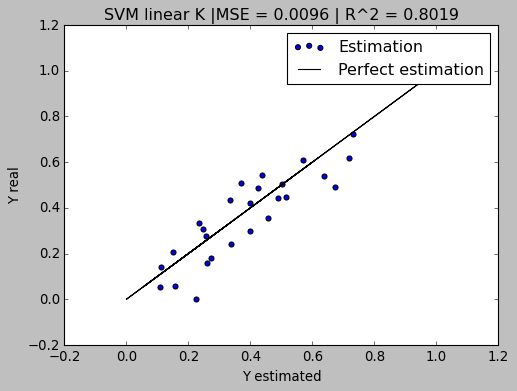

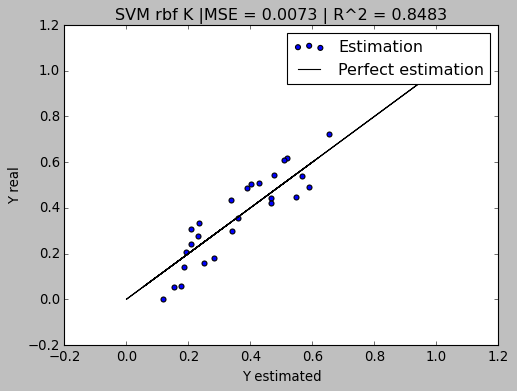

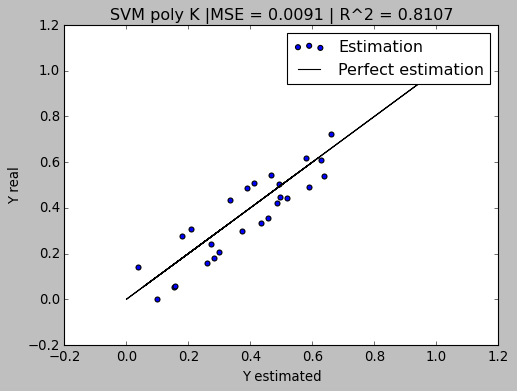

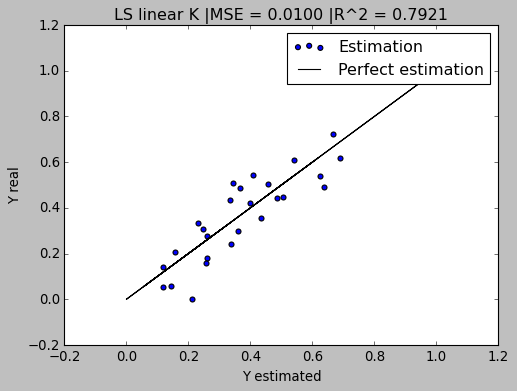

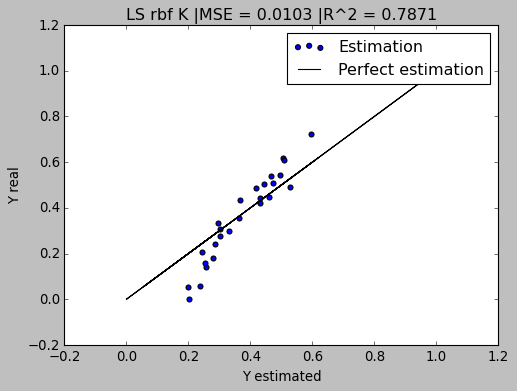

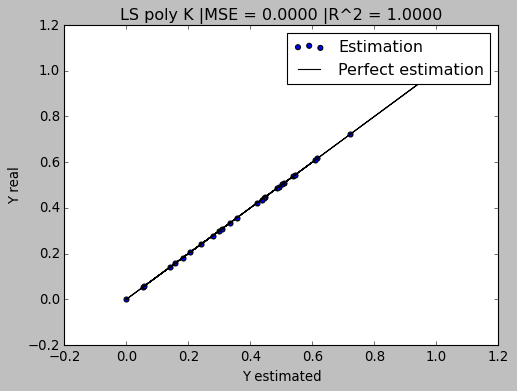

In [195]:
_, _ = compare_svr(X, y, 0, 'linear', 0.1, 'auto', 4, 'Yes')
_, _ = compare_svr(X, y, 0, 'rbf', 0.1, 'auto', 4, 'Yes')
_, _ = compare_svr(X, y, 0, 'poly', 0.1, 'auto', 3, 'Yes')
_, _ = compare_lssvm(X, y, 0, 'linear', 1, 4, 'Yes')
_, _ = compare_lssvm(X, y, 0, 'rbf', 1, 4, 'Yes')
_, _ = compare_lssvm(X, y, 0, 'poly', 1, 4, 'Yes')

Se puede apreciar el comportamiento del kernel lineal es similar a lo que esperaríamos en una regresión lineal con errores no auto correlacionados y posiblemente normalizados.

El kernel radial, tiene un comportamiento particular, ya que podemos ver que a partir de 0.5 de la y estimada se mueve como una sigmoidal.

Pero definitivamente el resultado que llama más la atención es LS - SVM, con Kernel polinomial, de potencia 4, arroja sorprendentemente buenos resultados. Parece que hay un error pero vamos a analizar más a fondo los resultados observando la transformación dependiendo el grado el polinomio. Ahora si, ya seperamos para entrenamiento y prueba.

In [196]:
mse_ls = []
r2_ls = []
mse_ls_tst = []
r2_ls_tst = []
grado = []
for i in range(2,9):
    mse_ls_i, r2_ls_i, mse_ls_tst_i, r2_ls_tst_i = compare_lssvm(X, y, 2, 'poly', gamma=1, d=i)
    mse_ls.append(mse_ls_i)
    r2_ls.append(r2_ls_i)
    mse_ls_tst.append(mse_ls_tst_i)
    r2_ls_tst.append(r2_ls_tst_i)
    grado.append(i)

ls_poly_test = np.column_stack((grado,mse_ls, r2_ls, mse_ls_tst, r2_ls_tst))
ls_poly_test = pd.DataFrame(ls_poly_test, columns=['Grado', 'MSE Train', 'R2 Train', 'MSE Test', 'R2 Test'])
ls_poly_test

,Grado,MSE Train,R2 Train,MSE Test,R2 Test
0,2,0.0031591614815352108,0.9333291257658904,0.19202529835872711,-3.16
1,3,2.7801060325715093e-05,0.9994132870360113,6.62790089019421,-142.61
2,4,6.915604066474567e-08,0.999998540532443,48.09329057852308,-1041.09
3,5,2.1553564785773932e-08,0.9999995451340441,15773.51591776852,-341781.56
4,6,5.08495500828194e-07,0.9999892687221649,2082809.313981352,-45130576.93
5,7,0.01002561885172178,0.7884195608584592,11587972.93075935,-251089674.79
6,8,0.022580510021056814,0.5234614145066299,179732874.09513757,-3894474844.21


La previa tabla muestra que el grado del polinomio 2 es ya bastante acertado a un $R^2$ 0.93. Y el $R^2$ sigue mejorando hasta el grado 5 donde esta básicamente perfecto. Después de eso comienza de decadencia, y en el grado 8 el $R^2$ ya es solo de la mitad.

Sin embargo, para los datos de prueba los resultados son muy malos con $R^2$ negativo. It can be negative because the model can be arbitrarily worse.

La conclusión es que el kernel polinomial es very bad for these series and the training is overfitted.

El siguiente paso es hacer lo mismo con todas las variables para observar sus resultados de error cuadrado promedio y ajuste. Como la intención no es encontrar los mejores hiperparámetros, se mantendrá los mismos valores para los hiperparámetros de la siguiente manera:
- épsilon: 0.1
- SVR gamma: 'auto'
- grado polinomial: 2
- LS SVR gamma: 1

In [197]:
mse_ls = []
r2_ls = []
formulacion = []
account = []
kernel = []

for acc in data_scale.columns:
    X, y = build_data_sets(acc)

    #call all the models and save the results and the model and formulation
    _, _, mse_ls_i, r2_ls_i = compare_svr(X, y, 2,'linear', 0.1, 'auto', 2)
    mse_ls.append(mse_ls_i)
    r2_ls.append(r2_ls_i)
    formulacion.append('SVM')
    account.append(acc)
    kernel.append('linear')
    _, _, mse_ls_i, r2_ls_i = compare_svr(X, y, 2,'rbf', 0.1, 'auto', 2)
    mse_ls.append(mse_ls_i)
    r2_ls.append(r2_ls_i)
    formulacion.append('SVM')
    account.append(acc)
    kernel.append('rbf')
    _, _, mse_ls_i, r2_ls_i = compare_svr(X, y, 2, 'poly', 0.1, 'auto', 2)
    mse_ls.append(mse_ls_i)
    r2_ls.append(r2_ls_i)
    formulacion.append('SVM')
    account.append(acc)
    kernel.append('poly')
    _, _, mse_ls_i, r2_ls_i = compare_lssvm(X, y, 2,'linear', 1, 2)
    mse_ls.append(mse_ls_i)
    r2_ls.append(r2_ls_i)
    formulacion.append('LS-SVM')
    account.append(acc)
    kernel.append('linear')
    _, _, mse_ls_i, r2_ls_i = compare_lssvm(X, y, 2,'rbf', 1, 2)
    mse_ls.append(mse_ls_i)
    r2_ls.append(r2_ls_i)
    formulacion.append('LS-SVM')
    account.append(acc)
    kernel.append('rbf')
    _, _, mse_ls_i, r2_ls_i = compare_lssvm(X, y, 2, 'poly', 1, 2)
    mse_ls.append(mse_ls_i)
    r2_ls.append(r2_ls_i)
    formulacion.append('LS-SVM')
    account.append(acc)
    kernel.append('poly')


In [198]:
results = np.column_stack((account, formulacion, kernel, mse_ls, r2_ls))
results = pd.DataFrame(results, columns=['Cuenta', 'Formulación', 'Kernel', 'MSE', 'R2'])
results['R2'] = round(results['R2'].astype('float'),4)
results_r2 = results.pivot(index=['Cuenta', 'Formulación'], columns=['Kernel'], values=['MSE'])
results_r2

MSE                        \
Kernel                            linear                  poly   
Cuenta Formulación                                               
1206   LS-SVM         0.5050542019382546    0.4931263653351438   
       SVM            0.4720307536709246    0.4720307536709246   
2561   LS-SVM        0.01574662429684042   0.31490638326141146   
       SVM          0.010903831461450028   0.21436929542775676   
2569   LS-SVM       0.033802120563114164   0.19202529835872711   
       SVM          0.007798140757203312   0.22281148793213484   
2574   LS-SVM        0.41009869950230515    0.1875253507981893   
       SVM           0.38623279917845665   0.21818493136448786   
2575   LS-SVM        0.09458826627562195  0.027193314201466378   
       SVM           0.10900612365477597   0.01429336573581989   
2576   LS-SVM        0.17595087511980398    1.2386613010645307   
       SVM           0.07819584746952339    1.4638209714187775   
2577   LS-SVM         0.3858041046856339    1.3975962399194937   
       SVM            0.3040605842220708    1.0299889920035565   
2582   LS-SVM        0.01082069768747324   0.10795206695843454   
       SVM           0.03443638654874907   0.14065682376727182   

                                          
Kernel                               rbf  
Cuenta Formulación                        
1206   LS-SVM        0.48365760798804686  
       SVM            0.4720307536709246  
2561   LS-SVM        0.04109345328274784  
       SVM          0.008788078455436428  
2569   LS-SVM        0.05750522509168046  
       SVM            0.0368416440750218  
2574   LS-SVM         0.5034761496110863  
       SVM            0.3515908819545226  
2575   LS-SVM       0.022430076834658173  
       SVM          0.010876002743542466  
2576   LS-SVM          0.189066706299403  
       SVM           0.21986935761039952  
2577   LS-SVM         0.3055545391411708  
       SVM            0.3072323438630087  
2582   LS-SVM        0.16333269837629275  
       SVM           0.07385949694395443

Para ver gráficamente los resultados se graficara las 8 variables con la formulación y kernel con el mejor resultado:

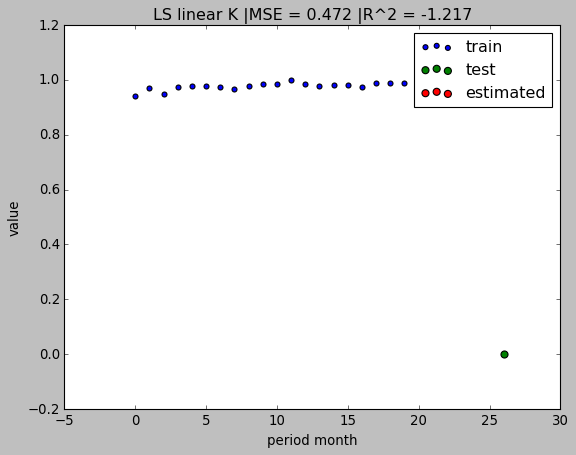

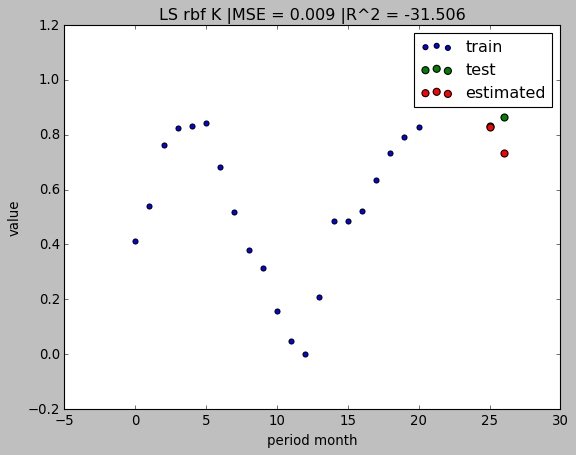

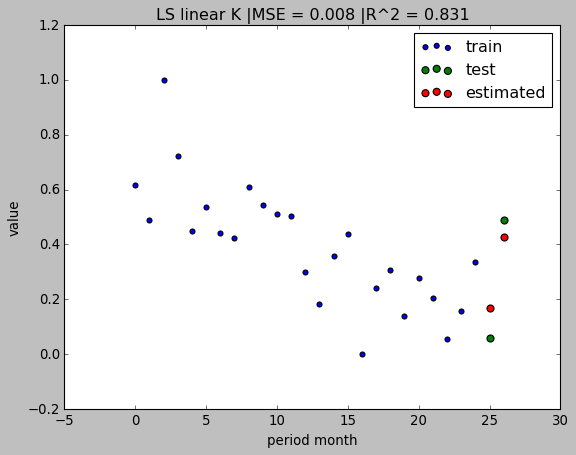

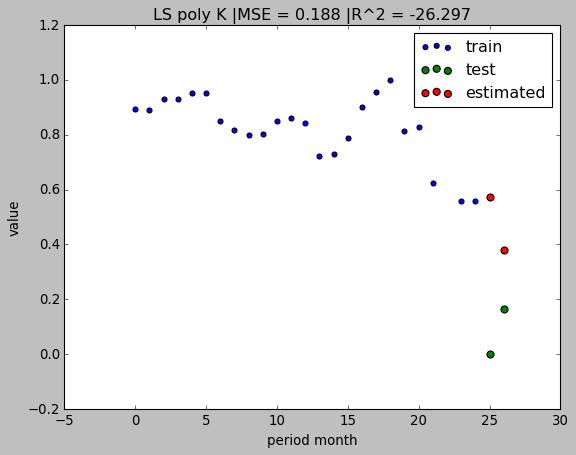

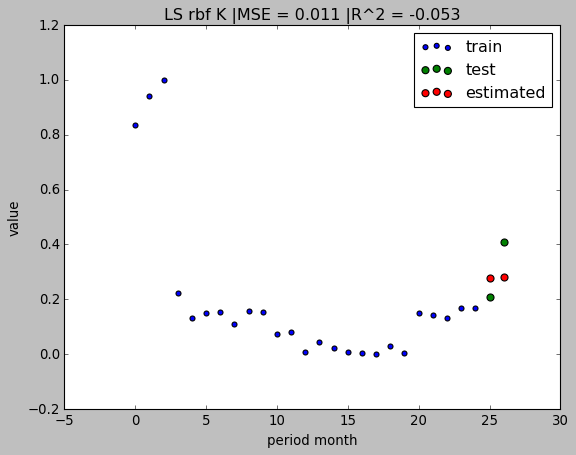

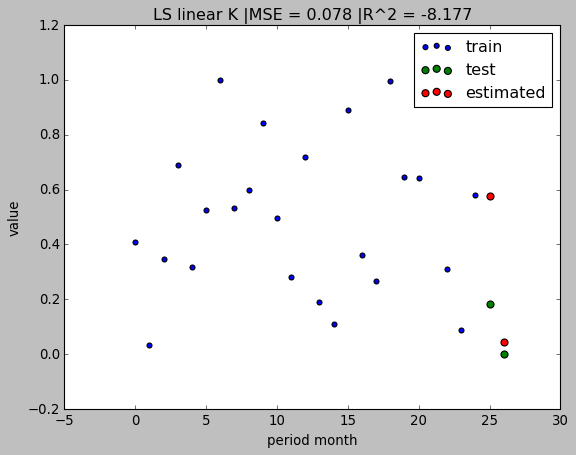

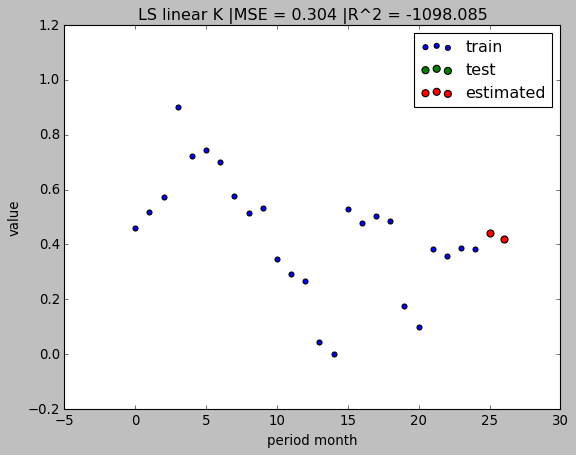

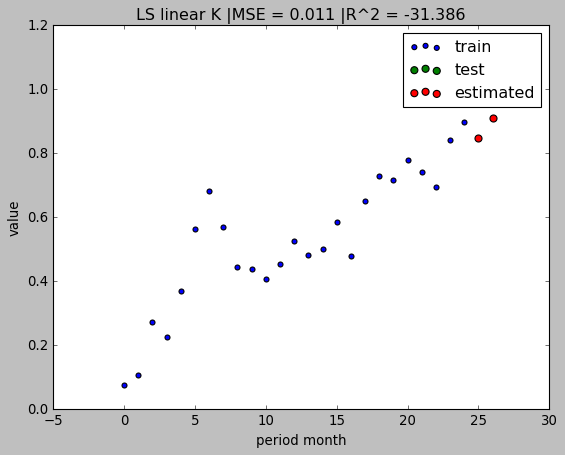

In [200]:
X, y = build_data_sets('1206')
_, _, _, _ = compare_svr(X, y, 2,'linear', 0.1, 'auto', 2, 'Yes')

X, y = build_data_sets('2561')
_, _, _, _ = compare_svr(X, y, 2,'rbf', 0.1, 'auto', 2, 'Yes')

X, y = build_data_sets('2569')
_, _, _, _ = compare_svr(X, y, 2,'linear', 0.1, 'auto', 2, 'Yes')

X, y = build_data_sets('2574')
_, _, _, _ = compare_lssvm(X, y, 2, 'poly', 1, 2, 'Yes')

X, y = build_data_sets('2575')
_, _, _, _ = compare_svr(X, y, 2,'rbf', 0.1, 'auto', 2, 'Yes')

X, y = build_data_sets('2576')
_, _, _, _ = compare_svr(X, y, 2,'linear', 0.1, 'auto', 2, 'Yes')

X, y = build_data_sets('2577')
_, _, _, _ = compare_svr(X, y, 2,'linear', 0.1, 'auto', 2, 'Yes')

X, y = build_data_sets('2582')
_, _, _, _ = compare_lssvm(X, y, 2, 'linear', 1, 2, 'Yes')

Indiscutiblemente el kernel polinomial es el modelo que regresa los mejores resultados sin importar la formulación. La formulación LS-SVM con kernel polinomial regresa un ajuste perfecto.
El kernel lineal y el radial funciona bien dependiendo de la cuenta, a veces tiene mejores resultados el lineal y a veces el radial. La formulación SVM regresa mejores resultados que LS - SVM para estos dos kernels.

## Referencias

- sklearn. (n.d.). sklearn.svm.SVR. Scikit-Learn. Retrieved May 6, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

- Danny, V. (2020, August 19). Building your own scikit-learn Regressor-Class: LS-SVM as an example. The Delocalized Physicist. Retrieved April 30, 2022, from https://dannyvanpoucke.be/building-scikit-learn-regressor-lssvm-en/